**Data Preprocessing of Telecom Churn Dataset**

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import chi2_contingency

telecom = pd.read_csv('Tel_churn.csv')
# importing the libraries and reading the data

Data cleaning

In [57]:
tel_data = telecom.copy()
tel_data.TotalCharges = pd.to_numeric(tel_data.TotalCharges, errors='coerce')
# We convert Total charges to numeric data type

print(tel_data.isnull().sum())
# We can see that there are total of 11 missing entries in Total Charges

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [59]:
missing_index = tel_data.loc[tel_data['TotalCharges'].isnull() == True].index
tel_data.loc[tel_data['TotalCharges'].isnull() == True]
# These are the rows having missing value in Total Charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
tel_data['TotalCharges'].fillna(tel_data['MonthlyCharges']*tel_data['tenure'], inplace=True)
print(tel_data['TotalCharges'].isnull().sum(), "\n")
tel_data.loc[missing_index[0]]

# We have now successfully filled the missing values

0 



customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              0.0
Churn                                      No
Name: 488, dtype: object

In [10]:
# Function to detect outliers 

def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:

        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

Outliers = detect_outliers(tel_data, 0, ['TotalCharges', 'MonthlyCharges'])
print(Outliers)

# There are no outliers outside [Q1 - 1.5*IQR, 1.5*IQR + Q3] in Monthly Charges and Total Charges

[]


In [11]:
contingency_table = pd.crosstab(tel_data['PhoneService'],
                            tel_data['Churn'], 
                               margins = False)
contingency_table

# Contingency Table is created 

Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


In [12]:
chi2_contingency(contingency_table)

# We can see that the chi square value is 0.915, p-value is 0.339 and degrees of freedom is three
# As p-value is not less than 0.05 we cannot reject the null hypothesis

(0.9150329892546948,
 0.3387825358066928,
 1,
 array([[ 501.01774812,  180.98225188],
        [4672.98225188, 1688.01774812]]))

Correlation is 0.8258804609332024


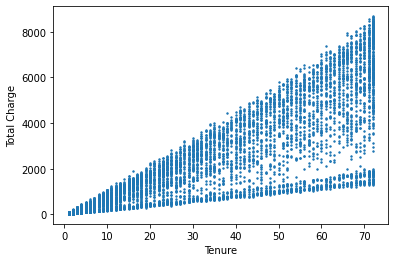

In [60]:
correlation = tel_data['tenure'].corr(tel_data['TotalCharges'])
print("Correlation is",correlation)
plt.scatter(tel_data['tenure'], tel_data['TotalCharges'], s=2)
plt.xlabel("Tenure")
plt.ylabel("Total Charge")
plt.show()

# Correlation between Tenure and Total charges is been found out to be 0.826
# In the scatter plot too we can see that they are positively correlated

In [14]:
from sklearn.decomposition import PCA

tenure_totalcharge =tel_data[['tenure', 'TotalCharges']].copy()
pca = PCA(n_components=1)
pca.fit(tenure_totalcharge)
pca.components_

# From the two columns tenure and total charge first principle component has been found out

array([[0.00895117, 0.99995994]])

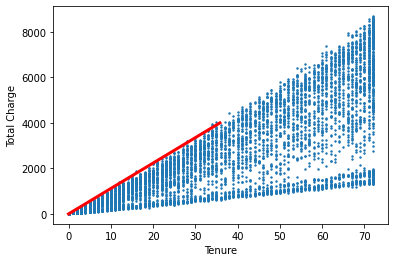

In [15]:
plt.scatter(tel_data['tenure'], tel_data['TotalCharges'], s=2)
plt.xlabel("Tenure")
plt.ylabel("Total Charge")
plt.plot([0, pca.components_[0][0]*4000], [0, pca.components_[0][1]*4000], color='red', linewidth=3)
plt.show()

In [17]:
tel_data = tel_data.drop(['customerID'], axis=1)

# Column of customer id is dropped

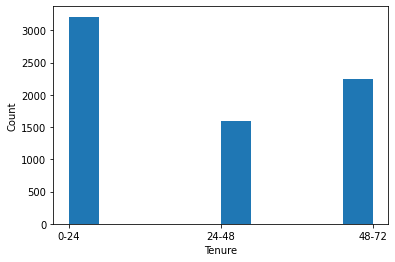

In [31]:
min_value = tel_data['tenure'].min()
max_value = tel_data['tenure'].max()
bins = np.linspace(min_value,max_value,4)
labels = ['0-24', '24-48', '48-72']
tel_data['tenure_binned'] = pd.cut(tel_data['tenure'], bins=bins, labels=labels, include_lowest=True)
plt.hist(tel_data['tenure_binned'])
plt.ylabel("Count")
plt.xlabel("Tenure")
plt.show()

# Dividing tenure into 3 bins for numerosity redustion

In [33]:
tel_data_sample = tel_data.sample(frac=0.5, replace=False ,random_state=1)
print(tel_data_sample.shape)
tel_data_sample

# 50% data is sampled randomly without replacement

(3522, 21)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_binned
3381,Female,0,No,No,41,Yes,No,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No,24-48
6180,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,...,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No,48-72
4829,Female,0,No,No,12,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No,0-24
3737,Female,0,No,No,5,Yes,Yes,DSL,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes,0-24
4249,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,...,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No,0-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,No,...,Yes,No,Yes,Two year,No,Credit card (automatic),77.30,5498.20,No,48-72
5909,Female,0,No,No,52,Yes,Yes,Fiber optic,No,Yes,...,No,No,No,One year,Yes,Mailed check,80.20,4297.60,No,48-72
5734,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,No,48-72
3493,Male,0,No,No,2,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),46.60,87.90,No,0-24


In [45]:
from scipy.stats import zscore
tel_data['MonthlyChargesNormalised'] = zscore(tel_data['MonthlyCharges'])
tel_data['MonthlyChargesNormalised']

# Monthly Charges has been normalised by zscore

0      -1.160323
1      -0.259629
2      -0.362660
3      -0.746535
4       0.197365
          ...   
7038    0.665992
7039    1.277533
7040   -1.168632
7041    0.320338
7042    1.358961
Name: MonthlyChargesNormalised, Length: 7043, dtype: float64

In [55]:
tel_data['MonthlyCharges_Binned'] = pd.qcut(tel_data['MonthlyCharges'], q=4, precision=2)
tel_data['MonthlyCharges_Binned']

0         (18.24, 35.5]
1         (35.5, 70.35]
2         (35.5, 70.35]
3         (35.5, 70.35]
4        (70.35, 89.85]
             ...       
7038     (70.35, 89.85]
7039    (89.85, 118.75]
7040      (18.24, 35.5]
7041     (70.35, 89.85]
7042    (89.85, 118.75]
Name: MonthlyCharges_Binned, Length: 7043, dtype: category
Categories (4, interval[float64, right]): [(18.24, 35.5] < (35.5, 70.35] < (70.35, 89.85] <
                                           (89.85, 118.75]]